<a href="https://colab.research.google.com/github/Hj-lh/TuwaiqChallenge/blob/main/TUWAIQ_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [111]:
df = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
df

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Completed Degree,Level of Education,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,Y
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,ذكر,منطقة الرياض,الرياض,453686d8-4023-4506-b2df-fac8b059ac26,PCRF,PCRF,NaN,NaN,...,نعم,البكالوريوس,هندسة حاسب الالي,NaN,2.44,4.0,غير موظف,NaN,NaN,0
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,ذكر,منطقة عسير,خميس مشيط,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,APMR,SWPS,NaN,متوسط,...,نعم,البكالوريوس,الإذاعة والتلفزيون والفيلم,الفنون والعلوم الإنسانية,5.00,5.0,طالب,NaN,NaN,0
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,ذكر,منطقة الرياض,الرياض,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,APMR,NaN,NaN,متوسط,...,نعم,البكالوريوس,Information Technology,NaN,3.50,5.0,موظف,NaN,NaN,0
3,1693e85b-f80e-40ce-846f-395ddcece6d3,23.0,ذكر,منطقة الرياض,الرياض,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9,TOSL,TOSL,NaN,NaN,...,نعم,البكالوريوس,حوسبة تطبيقية - (مسار شبكات الحاسب),NaN,3.55,5.0,خريج,NaN,NaN,0
4,98a0e8d0-5f80-4634-afd8-322aa0902863,23.0,ذكر,منطقة الرياض,الرياض,d32da0e9-1aed-48c3-992d-a22f9ccc741e,CAUF,SWPS,تقليدية,متوسط,...,لا,البكالوريوس,نظم المعلومات الحاسوبية,تكنولوجيا الاتصالات والمعلومات,4.00,5.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,cd196579-9590-441b-8787-41078f3cee25,31.0,أنثى,منطقة الرياض,الرياض,4f8c696a-b783-4d40-9776-105f6d3bd624,CAUF,SWPS,NaN,NaN,...,نعم,البكالوريوس,تقنية المعلومات,تكنولوجيا الاتصالات والمعلومات,4.40,5.0,NaN,NaN,NaN,0
6544,37bfc11c-ff8c-42dc-9cf9-0d13bb8f7131,27.0,أنثى,منطقة القصيم,بريدة,e94942dd-8684-4746-97ae-df567b9b0a4a,PCRF,PCRF,NaN,مبتدئ,...,نعم,البكالوريوس,علوم الحاسب,NaN,4.46,5.0,موظف,NaN,NaN,0
6545,fc114302-a79f-439f-a08b-fe0a51cf839e,24.0,أنثى,منطقة الرياض,الرياض,02ae0b47-64a6-47a1-b3c5-c0e4df393c30,PCRF,PCRF,تقليدية,مبتدئ,...,لا,البكالوريوس,نظم المعلومات,تكنولوجيا الاتصالات والمعلومات,4.93,5.0,موظف,دوام كامل,Yes,1
6546,4b6d9a36-4402-4c75-bc3a-fca927dbaf65,25.0,ذكر,منطقة الرياض,الرياض,9b4cedaa-fac0-4eac-aa4b-b05b6a0c97ff,PCRF,PCRF,NaN,متوسط,...,نعم,البكالوريوس,تقنية المعلومات,تكنولوجيا الاتصالات والمعلومات,4.00,4.0,غير موظف,تدريب,No,0


In [112]:
df.describe()

,Age,Program Days,University Degree Score,University Degree Score System,Y
count,6456.000000,6548.000000,6467.000000,6467.000000,6548.000000
mean,26.831165,19.691662,8.224432,9.773929,0.158674
std,5.535967,32.112061,19.120384,21.259962,0.365400
min,18.000000,3.000000,0.000000,4.000000,0.000000
25%,23.000000,5.000000,3.300000,5.000000,0.000000
50%,25.000000,12.000000,4.000000,5.000000,0.000000
75%,29.000000,19.000000,4.510000,5.000000,0.000000
max,57.000000,292.000000,100.000000,100.000000,1.000000


In [113]:
nullValues = df.isnull().sum()
print(nullValues)

Student ID                           0
Age                                 92
Gender                               0
Home Region                          2
Home City                            2
Program ID                           0
Program Main Category Code           0
Program Sub Category Code          935
Technology Type                   2982
Program Skill Level               1646
Program Presentation Method          0
Program Start Date                   0
Program End Date                     0
Program Days                         0
Completed Degree                     0
Level of Education                  26
Education Speaciality              277
College                           3890
University Degree Score             81
University Degree Score System      81
Employment Status                  566
Job Type                          4567
Still Working                     4567
Y                                    0
dtype: int64


In [114]:
columnToDrob =['Program Sub Category Code','Technology Type', 'Program Skill Level', 'College','Job Type','Still Working']
df_cleaned = df.drop(columns=columnToDrob, axis=1)
test_cleaned = test.drop(columns=columnToDrob, axis=1)

df_cleaned

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Presentation Method,Program Start Date,Program End Date,Program Days,Completed Degree,Level of Education,Education Speaciality,University Degree Score,University Degree Score System,Employment Status,Y
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,ذكر,منطقة الرياض,الرياض,453686d8-4023-4506-b2df-fac8b059ac26,PCRF,حضوري,2023-05-28,2023-06-08,12,نعم,البكالوريوس,هندسة حاسب الالي,2.44,4.0,غير موظف,0
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,ذكر,منطقة عسير,خميس مشيط,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,APMR,حضوري,2023-04-02,2023-04-06,5,نعم,البكالوريوس,الإذاعة والتلفزيون والفيلم,5.00,5.0,طالب,0
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,ذكر,منطقة الرياض,الرياض,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,APMR,حضوري,2023-07-23,2023-09-14,54,نعم,البكالوريوس,Information Technology,3.50,5.0,موظف,0
3,1693e85b-f80e-40ce-846f-395ddcece6d3,23.0,ذكر,منطقة الرياض,الرياض,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9,TOSL,حضوري,2023-07-23,2023-08-24,33,نعم,البكالوريوس,حوسبة تطبيقية - (مسار شبكات الحاسب),3.55,5.0,خريج,0
4,98a0e8d0-5f80-4634-afd8-322aa0902863,23.0,ذكر,منطقة الرياض,الرياض,d32da0e9-1aed-48c3-992d-a22f9ccc741e,CAUF,حضوري,2023-04-30,2023-06-22,54,لا,البكالوريوس,نظم المعلومات الحاسوبية,4.00,5.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,cd196579-9590-441b-8787-41078f3cee25,31.0,أنثى,منطقة الرياض,الرياض,4f8c696a-b783-4d40-9776-105f6d3bd624,CAUF,حضوري,2023-04-02,2023-06-06,66,نعم,البكالوريوس,تقنية المعلومات,4.40,5.0,NaN,0
6544,37bfc11c-ff8c-42dc-9cf9-0d13bb8f7131,27.0,أنثى,منطقة القصيم,بريدة,e94942dd-8684-4746-97ae-df567b9b0a4a,PCRF,عن بعد,2023-05-14,2023-05-25,12,نعم,البكالوريوس,علوم الحاسب,4.46,5.0,موظف,0
6545,fc114302-a79f-439f-a08b-fe0a51cf839e,24.0,أنثى,منطقة الرياض,الرياض,02ae0b47-64a6-47a1-b3c5-c0e4df393c30,PCRF,حضوري,2023-07-16,2023-07-20,5,لا,البكالوريوس,نظم المعلومات,4.93,5.0,موظف,1
6546,4b6d9a36-4402-4c75-bc3a-fca927dbaf65,25.0,ذكر,منطقة الرياض,الرياض,9b4cedaa-fac0-4eac-aa4b-b05b6a0c97ff,PCRF,حضوري,2024-01-07,2024-01-18,12,نعم,البكالوريوس,تقنية المعلومات,4.00,4.0,غير موظف,0


In [115]:
print(df_cleaned.isnull().sum())

Student ID                          0
Age                                92
Gender                              0
Home Region                         2
Home City                           2
Program ID                          0
Program Main Category Code          0
Program Presentation Method         0
Program Start Date                  0
Program End Date                    0
Program Days                        0
Completed Degree                    0
Level of Education                 26
Education Speaciality             277
University Degree Score            81
University Degree Score System     81
Employment Status                 566
Y                                   0
dtype: int64


In [116]:
age_median = df_cleaned['Age'].median()
df_cleaned['Age'] = df_cleaned['Age'].fillna(age_median)

df_cleaned.dropna(subset=['Level of Education'], inplace=True)

age_median = test_cleaned['Age'].median()
test_cleaned['Age'] = test_cleaned['Age'].fillna(age_median)

test_cleaned.dropna(subset=['Level of Education'], inplace=True)


In [117]:
mode_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned['Education Speaciality'] = mode_imputer.fit_transform(df_cleaned[['Education Speaciality']])
test_cleaned['Education Speaciality'] = mode_imputer.fit_transform(test_cleaned[['Education Speaciality']])

median_imputer = SimpleImputer(strategy='median')
df_cleaned['University Degree Score'] = median_imputer.fit_transform(df_cleaned[['University Degree Score']])
df_cleaned['University Degree Score System'] = median_imputer.fit_transform(df_cleaned[['University Degree Score System']])
test_cleaned['University Degree Score'] = median_imputer.fit_transform(test_cleaned[['University Degree Score']])
test_cleaned['University Degree Score System'] = median_imputer.fit_transform(test_cleaned[['University Degree Score System']])

In [118]:
def impute_employment_status(row):
    if pd.isnull(row['Employment Status']):
        if row['Age'] < 23:
            return 'طالب'
        else:
            if row['University Degree Score System'] == 5 and row['University Degree Score'] >= 4:
                return 'موظف'
            elif row['University Degree Score System'] == 4 and row['University Degree Score'] >= 3:
                return 'موظف'
            else:
                return 'غير موظف'
    else:
        return row['Employment Status']

df_cleaned['Employment Status'] = df_cleaned.apply(impute_employment_status, axis=1)

df_cleaned.dropna(subset=['Home City', 'Home Region'], inplace=True)
test_cleaned['Employment Status'] = test_cleaned.apply(impute_employment_status, axis=1)

test_cleaned.dropna(subset=['Home City', 'Home Region'], inplace=True)

In [119]:

print(df_cleaned.isnull().sum())

Student ID                        0
Age                               0
Gender                            0
Home Region                       0
Home City                         0
Program ID                        0
Program Main Category Code        0
Program Presentation Method       0
Program Start Date                0
Program End Date                  0
Program Days                      0
Completed Degree                  0
Level of Education                0
Education Speaciality             0
University Degree Score           0
University Degree Score System    0
Employment Status                 0
Y                                 0
dtype: int64


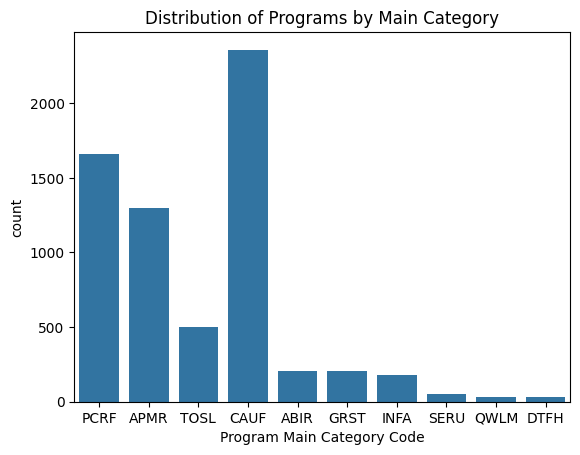

In [120]:
sns.countplot(x='Program Main Category Code', data=df_cleaned)
plt.title('Distribution of Programs by Main Category')
plt.show()

In [121]:
pip install python-bidi


In [122]:
pip install arabic-reshaper


In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

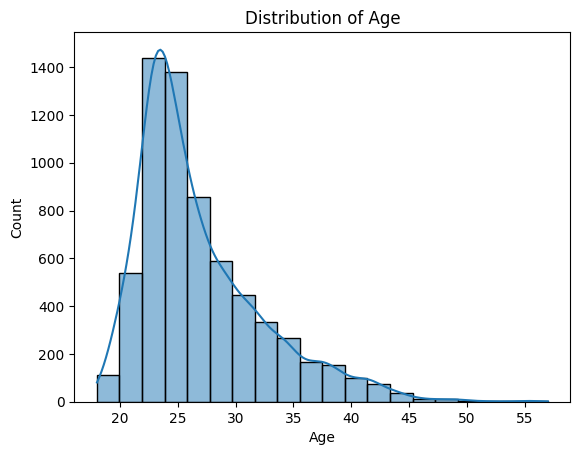

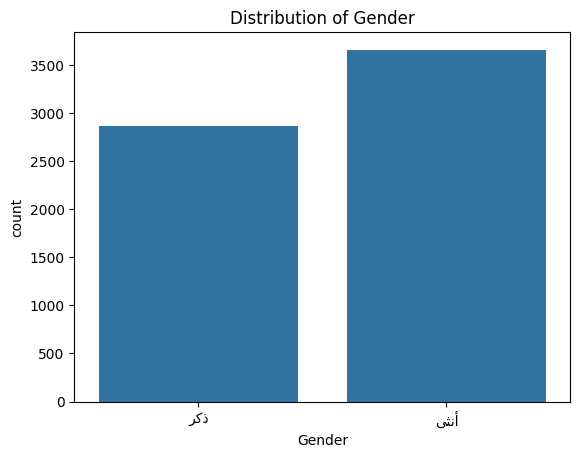

In [124]:
sns.histplot(df_cleaned['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()
# df_cleaned['Gender'] contains Arabic text
sns.countplot(x=df_cleaned['Gender'].apply(lambda x: get_display(arabic_reshaper.reshape(x))))
plt.title('Distribution of Gender')
plt.show()

Start Date Range: (Timestamp('2022-06-05 00:00:00'), Timestamp('2024-01-15 00:00:00'))
End Date Range: (Timestamp('2022-06-09 00:00:00'), Timestamp('2024-01-25 00:00:00'))

Sample Durations:
0   11 days
1    4 days
2   53 days
3   32 days
4   53 days
Name: Duration, dtype: timedelta64[ns]

Start Date Frequency:
2023-04-02    345
2023-07-23    298
2023-07-16    267
2023-05-14    264
2023-03-05    246
Name: Program Start Date, dtype: int64


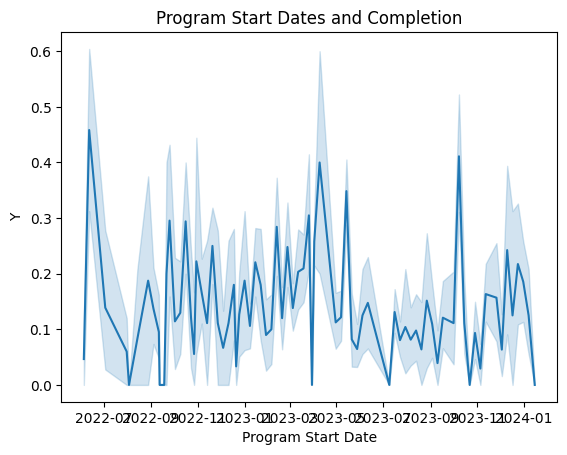

In [125]:
df_cleaned['Program Start Date'] = pd.to_datetime(df_cleaned['Program Start Date'])
df_cleaned['Program End Date'] = pd.to_datetime(df_cleaned['Program End Date'])

# Basic Analysis
## Range
start_date_range = df_cleaned['Program Start Date'].min(), df_cleaned['Program Start Date'].max()
end_date_range = df_cleaned['Program End Date'].min(), df_cleaned['Program End Date'].max()

## Duration
df_cleaned['Duration'] = df_cleaned['Program End Date'] - df_cleaned['Program Start Date']

## Frequency (Example: Count how many times each start date appears)
start_date_frequency = df_cleaned['Program Start Date'].value_counts()

print(f"Start Date Range: {start_date_range}")
print(f"End Date Range: {end_date_range}")
print(f"\nSample Durations:\n{df_cleaned['Duration'].head()}")
print(f"\nStart Date Frequency:\n{start_date_frequency.head()}")
sns.lineplot(x='Program Start Date', y='Y', data=df_cleaned)
plt.title('Program Start Dates and Completion')
plt.show()

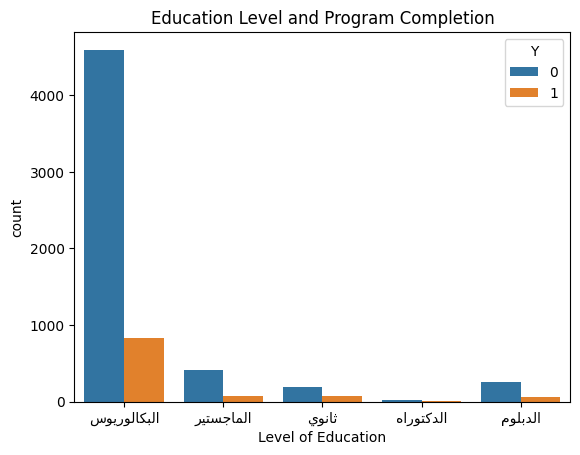

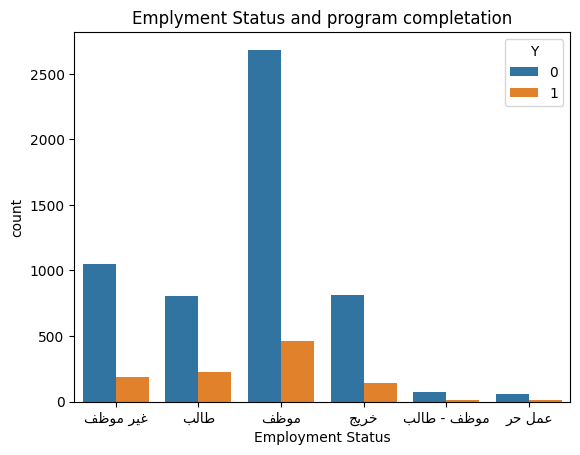

In [126]:
sns.countplot(x=df_cleaned['Level of Education'].apply(lambda x: get_display(arabic_reshaper.reshape(x))),hue='Y', data=df_cleaned)
plt.title('Education Level and Program Completion')
plt.show()

sns.countplot(x=df_cleaned['Employment Status'].apply(lambda x: get_display(arabic_reshaper.reshape(x))), hue='Y', data=df_cleaned)
plt.title('Emplyment Status and program completation')
plt.show()

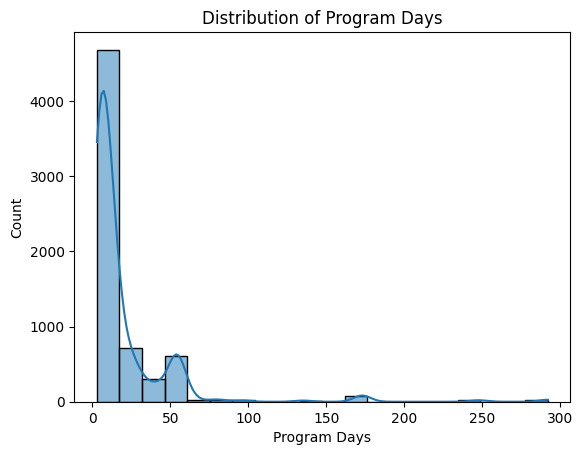

In [127]:
sns.histplot(df_cleaned['Program Days'], bins=20, kde=True)
plt.title('Distribution of Program Days')
plt.show()

In [128]:
test_cleaned.columns


Index(['Student ID', 'Age', 'Gender', 'Home Region', 'Home City', 'Program ID',
       'Program Main Category Code', 'Program Presentation Method',
       'Program Start Date', 'Program End Date', 'Program Days',
       'Completed Degree', 'Level of Education', 'Education Speaciality',
       'University Degree Score', 'University Degree Score System',
       'Employment Status'],
      dtype='object')

In [129]:
df_cleaned.columns

Index(['Student ID', 'Age', 'Gender', 'Home Region', 'Home City', 'Program ID',
       'Program Main Category Code', 'Program Presentation Method',
       'Program Start Date', 'Program End Date', 'Program Days',
       'Completed Degree', 'Level of Education', 'Education Speaciality',
       'University Degree Score', 'University Degree Score System',
       'Employment Status', 'Y', 'Duration'],
      dtype='object')

In [130]:
categorical_columns = [ 'Gender', 'Home Region', 'Home City',
       'Program Main Category Code', 'Program Presentation Method',
       'Completed Degree', 'Level of Education', 'Education Speaciality',
       'University Degree Score', 'University Degree Score System',
       'Employment Status',]

# Iterate through each categorical column and one-hot encode
for col in categorical_columns:
    one_hot = pd.get_dummies(df_cleaned[col], prefix=col)
    df_cleaned = pd.concat([df_cleaned, one_hot], axis=1)
    df_cleaned.drop(col, axis=1, inplace=True)
    one_hot = pd.get_dummies(test_cleaned[col], prefix=col)
    test_cleaned = pd.concat([test_cleaned, one_hot], axis=1)
    test_cleaned.drop(col, axis=1, inplace=True)
df_cleaned

,Student ID,Age,Program ID,Program Start Date,Program End Date,Program Days,Y,Duration,Gender_أنثى,Gender_ذكر,...,University Degree Score_100.0,University Degree Score System_4.0,University Degree Score System_5.0,University Degree Score System_100.0,Employment Status_خريج,Employment Status_طالب,Employment Status_عمل حر,Employment Status_غير موظف,Employment Status_موظف,Employment Status_موظف - طالب
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,453686d8-4023-4506-b2df-fac8b059ac26,2023-05-28,2023-06-08,12,0,11 days,0,1,...,0,1,0,0,0,0,0,1,0,0
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,2023-04-02,2023-04-06,5,0,4 days,0,1,...,0,0,1,0,0,1,0,0,0,0
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,2023-07-23,2023-09-14,54,0,53 days,0,1,...,0,0,1,0,0,0,0,0,1,0
3,1693e85b-f80e-40ce-846f-395ddcece6d3,23.0,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9,2023-07-23,2023-08-24,33,0,32 days,0,1,...,0,0,1,0,1,0,0,0,0,0
4,98a0e8d0-5f80-4634-afd8-322aa0902863,23.0,d32da0e9-1aed-48c3-992d-a22f9ccc741e,2023-04-30,2023-06-22,54,0,53 days,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,cd196579-9590-441b-8787-41078f3cee25,31.0,4f8c696a-b783-4d40-9776-105f6d3bd624,2023-04-02,2023-06-06,66,0,65 days,1,0,...,0,0,1,0,0,0,0,0,1,0
6544,37bfc11c-ff8c-42dc-9cf9-0d13bb8f7131,27.0,e94942dd-8684-4746-97ae-df567b9b0a4a,2023-05-14,2023-05-25,12,0,11 days,1,0,...,0,0,1,0,0,0,0,0,1,0
6545,fc114302-a79f-439f-a08b-fe0a51cf839e,24.0,02ae0b47-64a6-47a1-b3c5-c0e4df393c30,2023-07-16,2023-07-20,5,1,4 days,1,0,...,0,0,1,0,0,0,0,0,1,0
6546,4b6d9a36-4402-4c75-bc3a-fca927dbaf65,25.0,9b4cedaa-fac0-4eac-aa4b-b05b6a0c97ff,2024-01-07,2024-01-18,12,0,11 days,0,1,...,0,1,0,0,0,0,0,1,0,0


In [131]:
columnToDrob =['Program ID','Student ID','Program Start Date','Program End Date']
df_cleaned = df_cleaned.drop(columns=columnToDrob, axis=1)
test_cleaned = test_cleaned.drop(columns=columnToDrob, axis=1)

df_cleaned

,Age,Program Days,Y,Duration,Gender_أنثى,Gender_ذكر,Home Region_المنطقة الشرقية,Home Region_منطقة الباحة,Home Region_منطقة الجوف,Home Region_منطقة الحدود الشمالية,...,University Degree Score_100.0,University Degree Score System_4.0,University Degree Score System_5.0,University Degree Score System_100.0,Employment Status_خريج,Employment Status_طالب,Employment Status_عمل حر,Employment Status_غير موظف,Employment Status_موظف,Employment Status_موظف - طالب
0,37.0,12,0,11 days,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,21.0,5,0,4 days,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,24.0,54,0,53 days,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,23.0,33,0,32 days,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,23.0,54,0,53 days,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,31.0,66,0,65 days,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6544,27.0,12,0,11 days,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6545,24.0,5,1,4 days,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6546,25.0,12,0,11 days,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [132]:
for column in df_cleaned.columns:
    print(column)


Age
Program Days
Y
Duration
Gender_أنثى
Gender_ذكر
Home Region_المنطقة الشرقية
Home Region_منطقة الباحة
Home Region_منطقة الجوف
Home Region_منطقة الحدود الشمالية
Home Region_منطقة الرياض
Home Region_منطقة القصيم
Home Region_منطقة المدينة المنورة
Home Region_منطقة تبوك
Home Region_منطقة جازان
Home Region_منطقة حائل
Home Region_منطقة عسير
Home Region_منطقة مكة المكرمة
Home Region_منطقة نجران
Home City_أبها
Home City_أبو عريش
Home City_أحد المسارحة
Home City_أحد رفيدة
Home City_أملج
Home City_ابها
Home City_الأحساء
Home City_الباحة
Home City_البدائع
Home City_البكيرية
Home City_الجبيل
Home City_الجموم
Home City_الحريملاء
Home City_الحناكية
Home City_الخبر
Home City_الخرج
Home City_الخفجي
Home City_الدرب
Home City_الدرعية
Home City_الدلم
Home City_الدمام
Home City_الدوادمي
Home City_الرس
Home City_الرياض
Home City_الزلفي
Home City_الطائف
Home City_الظهران
Home City_العاصمة المقدسة
Home City_العرضيات
Home City_العلا
Home City_الغاط
Home City_القرى
Home City_القريات
Home City_القطيف
Home Cit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [99]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop('Y', axis=1)
y = df_cleaned['Y']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
for col in X_train.columns:
    if X_train[col].dtype == 'timedelta64[ns]':
        X_train[col] = X_train[col].dt.total_seconds()
        X_val[col] = X_val[col].dt.total_seconds()

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
val_predictions = model.predict(X_val)

accuracy = accuracy_score(y_val, val_predictions)
f1 = f1_score(y_val, val_predictions, average='macro')

print(f"Validation Accuracy: {accuracy}")
print(f"Validation F1 Score: {f1}")

Validation Accuracy: 0.8781609195402299
Validation F1 Score: 0.7490776112580403
